In [2]:
import os
import pandas as pd
os.listdir()
df = pd.read_excel('Consolidated_Final_colombia.xlsx')
df =  df[df["Citizenship"]=="Ethiopia"]

KeyError: 'Citizenship'

In [2]:
import networkx as nx
df.head()

,Unnamed: 0,country_of_residence,gender,firm_id,sector_type,data_id,week,file,reason_name,amount,...,timeline,payment_type,transaction_date,date_created,edit_count,surveyor,file1,sector,duplicated,Dropouts
0,0,Colombia,Female,BG-SH-GO-2823,AD-01,IN00136076,Week 1,income,Income Source 1,3600000.0,...,Time as expected,NaN,2021-06-04,2021-06-10,1.0,Wilson Cortes - Enc Bog 1,income,AD,False,False
1,1,Colombia,Female,BG-SH-GO-2823,AD-01,IN00136075,Week 2,income,Income Source 1,3000000.0,...,Time as expected,NaN,2021-06-07,2021-06-10,1.0,Wilson Cortes - Enc Bog 1,income,AD,False,False
2,2,Colombia,Female,BG-SH-GO-2823,AD-01,IN00138869,Week 2,income,Income Source 1,1300000.0,...,Time as expected,NaN,2021-06-09,2021-06-19,1.0,Wilson Cortes - Enc Bog 1,income,AD,False,False
3,3,Colombia,Female,BG-SH-GO-2823,AD-01,IN00138870,Week 2,income,Income Source 1,1900000.0,...,Time as expected,NaN,2021-06-12,2021-06-19,1.0,Wilson Cortes - Enc Bog 1,income,AD,False,False
4,4,Colombia,Female,BG-SH-GO-2823,AD-01,IN00141533,Week 4,income,Income Source 1,1600000.0,...,Time as expected,Full payment,2021-06-23,2021-06-24,1.0,Wilson Cortes - Enc Bog 1,income,AD,False,False


In [10]:
firms = list(df.firm_id.unique())[:10]
G = nx.Graph()
df["amount"] = df["amount"] * 0.00026
nodes = list(df.firm_id.unique())+list(df.file1.unique())
G.add_nodes_from(nodes)
G.nodes()

NodeView(('BG-SH-GO-2823', 'BDS-BG-UQ-GH-3615', 'BG--GO-3181', 'BG-SH-GO-3425', 'BG-EB-GH-3175', 'CL-CH-3514', 'BG-BD-GH-2225', 'BG-BD-NR-2307', 'CL-CF-CH-3156', 'CL-CF-CH-3042', 'BG-NP-GO-1373', 'BG-NP-GH-1475', 'BDS-BR-LD-BT-3671', 'CL-CN-CH-1061', 'CL-CN-CH-1054', 'CL-CV-CH-3836', 'BG-RM-GO-1554', 'BDS-BR-SP-BH-3756', 'CL-CV-CH-3772', 'CL-CN-CH-1105', 'CL-CN-CH-1144', 'CL-CN-CH-1209', 'CL-CV-CH-3773', 'BG-RU-GT-1661', 'BG-RM-GO-1776', 'BDS-CL-MN-CH-3750', 'CL-CN-CH-1333', 'BR-SQ-BH-2172', 'BR-CC-BH-1756', 'CL-CN-CO-3780', 'BR-CB-BO-1953', 'BG-RU-GT-1921', 'BR-SQ-BH-2170', 'BR-CC-BH-1647', 'BG-RU-GT-1929', 'BR-SQ-BH-2784', 'CL-CV-CH-2592', 'BR-CC-BH-1663', 'BR-CB-BO-1941', 'CL-CP-CO-2388', 'BR-SC-BH-1170', 'BR-CC-BH-2125', 'CL-CE-CT-1030', 'BR-SQ-BH-2148', 'CL-CE-CT-1282', 'BR-CC-BH-3338', 'BDS-CL-CF-CH-3618', 'CL-CN-CH-1234', 'CL-CN-CO-3851', 'CL-CN-CH-1484', 'BG-PA-GO-2099', 'CL-AP-CT-3082', 'CL-CI-CO-2909', 'BR-LN-BH-3856', 'BR-LN-BH-3857', 'CL-CH-CH-3783', 'BR-LN-BH-3855', 'CL-CU

In [44]:
dt = df.groupby(["firm_id","file1"])["amount"].agg(["mean",'count']).reset_index()


dt.head()

,firm_id,file1,mean,count
0,BDS-BG-SB-GH-3617,employee,53.963641,43
1,BDS-BG-SB-GH-3617,expense,147.649455,48
2,BDS-BG-SB-GH-3617,income,271.015680,47
3,BDS-BG-SB-GH-3617,loans_given,24.761713,42
4,BDS-BG-SB-GH-3617,loans_given_repayment,-0.000192,42


In [56]:
dy = df.groupby(["firm_id","week"])["amount"].agg(["sum"]).reset_index()
dy["sum"] = [i if i>0 else 0 for i in dy["sum"]]
dy1 = dy.groupby(["firm_id"]).agg("mean").reset_index()
dy1.head()

,firm_id,sum
0,BDS-BG-SB-GH-3617,1116.445287
1,BDS-BG-UQ-GH-3615,10692.543003
2,BDS-BR-CB-BO-3643,2042.240563
3,BDS-BR-CO-BO-3644,248.857143
4,BDS-BR-CR-BT-3672,3550.499267


In [58]:
x = pd.DataFrame()
x["firm_id"] = dt["file1"].unique()
x["sum"] = 500
fin = pd.concat((dy,x))
fin.tail()

for i,j in zip(fin["firm_id"],fin["sum"]):
    G.nodes()[i]["mean"] = j
#G.nodes(data = True)
    

In [59]:
edges = []

for i,j in zip(dt["firm_id"],dt["file1"]):
    edges.append((i,j))
G.add_edges_from(edges)
G.edges(data = True)

EdgeDataView([('BG-SH-GO-2823', 'employee', {'mean_income': 53.96364093023256, 'count': 43}), ('BG-SH-GO-2823', 'expense', {'mean_income': 147.64945541666665, 'count': 48}), ('BG-SH-GO-2823', 'income', {'mean_income': 271.01568, 'count': 47}), ('BG-SH-GO-2823', 'loans_given', {'mean_income': 24.76171285714286, 'count': 42}), ('BG-SH-GO-2823', 'loans_given_repayment', {'mean_income': -0.0001919047619047619, 'count': 42}), ('BG-SH-GO-2823', 'loans_taken', {'mean_income': -0.0001919047619047619, 'count': 42}), ('BG-SH-GO-2823', 'loans_taken_repayment', {'mean_income': -0.0001919047619047619, 'count': 42}), ('BG-SH-GO-2823', 'savings_deposit', {'mean_income': 259.951844680851, 'count': 47}), ('BG-SH-GO-2823', 'savings_withdrawal', {'mean_income': 205.13602571428572, 'count': 56}), ('BDS-BG-UQ-GH-3615', 'employee', {'mean_income': 82.26959812499999, 'count': 64}), ('BDS-BG-UQ-GH-3615', 'expense', {'mean_income': 1289.9462295652174, 'count': 69}), ('BDS-BG-UQ-GH-3615', 'income', {'mean_incom

In [60]:
for i,j in zip(G.edges(),dt["count"]):
    if j>0:
        G.edges[i]["count"] = j
    else:
        G.edges[i]["count"] = 0

In [61]:
for i in G.nodes():
    if i in dt.file1.unique():
        G.nodes()[i]["color"] = "yellow"
    else:
        G.nodes()[i]["color"] = "green"
G.nodes(data = True)

NodeDataView({'BG-SH-GO-2823': {'color': 'green', 'mean': 4549.999999999999}, 'BDS-BG-UQ-GH-3615': {'color': 'green', 'mean': 25999.999999999996}, 'BG--GO-3181': {'color': 'green', 'mean': 468.0}, 'BG-SH-GO-3425': {'color': 'green', 'mean': 0.0}, 'BG-EB-GH-3175': {'color': 'green', 'mean': 2391.9999999999995}, 'CL-CH-3514': {'color': 'green', 'mean': 876.2}, 'BG-BD-GH-2225': {'color': 'green', 'mean': 935.9999999999999}, 'BG-BD-NR-2307': {'color': 'green', 'mean': 779.9999999999999}, 'CL-CF-CH-3156': {'color': 'green', 'mean': 18551.519999999997}, 'CL-CF-CH-3042': {'color': 'green', 'mean': 673.4}, 'BG-NP-GO-1373': {'color': 'green', 'mean': 1190.072}, 'BG-NP-GH-1475': {'color': 'green', 'mean': 2392.0}, 'BDS-BR-LD-BT-3671': {'color': 'green', 'mean': 52.519999999999996}, 'CL-CN-CH-1061': {'color': 'green', 'mean': 7852.0}, 'CL-CN-CH-1054': {'color': 'green', 'mean': 6499.999999999999}, 'CL-CV-CH-3836': {'color': 'green', 'mean': 9581.0}, 'BG-RM-GO-1554': {'color': 'green', 'mean': 187

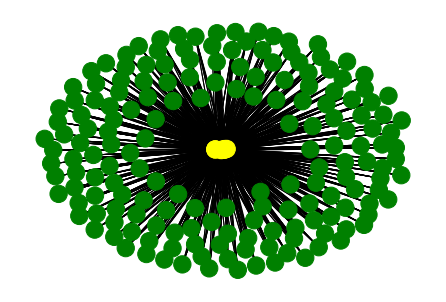

In [62]:
nx.draw(G,
        node_color = [i[1]["color"] for i in G.nodes(data = True)])

In [63]:
nx.write_graphml(G,"consolidated.graphml")